In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error


# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

print('Finished successfully loading packages')

Finished successfully loading packages


# Columns represent (in order): 

0 - Median age of the houses in the block (in years) \
1 - Total number of rooms in a given block \
2 - Number of bedrooms in a given block \
3 - Population in the block \
4 - Number of households in the block \
5 - Median household income in the block (in thousands of dollars) \
6 - Proximity to the ocean (rated on a scale from 0 = closest to 4 = farthest) \
7 - Median house value in the block (in dollars) \

In [2]:
# Reading data from a CSV file into a NumPy array
def read_csv(filename):
    data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(row)
    return np.array(data)

file_path = 'housingUnits.csv'
data = read_csv(file_path)
all_columns = data[0:1, :]  # This selects all rows and all columns
print(all_columns)

[['\ufeffhousing_median_age' 'total_rooms' 'total_bedrooms' 'population'
  'households' 'median_income' 'ocean_proximity' 'median_house_value']]


In [3]:
# Loading the columns
housing_median_age_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(0,), skip_header=1)

total_rooms_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(1,), skip_header=1)
total_bedrooms_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(2,), skip_header=1)
population_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(3,), skip_header=1)
households_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(4,), skip_header=1)

median_income_col = np.genfromtxt(file_path, delimiter=',', dtype=float, usecols=(5,), skip_header=1)
ocean_proximity_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(6,), skip_header=1)
median_house_value_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(7,), skip_header=1)

In [4]:
# Normalizing our columns
rooms_by_population = total_rooms_col / population_col
bedrooms_by_population = total_bedrooms_col / population_col

rooms_by_households = total_rooms_col / households_col
bedrooms_by_households = total_bedrooms_col / households_col

In [5]:
def plot_linear_regression(predictor, outcome, title="", xlab="", ylab=""):
    """
    Takes two different columns: predictor and the outcome, and then returns a matplotlib plot of the LinearRegression using sklearn + 
    r2_score of it
    """
    # Reshape predictor and outcome columns to 2D arrays
    predictor = predictor.reshape(-1, 1)
    outcome = outcome.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(predictor, outcome)
    
    # Make predictions
    predictions = model.predict(predictor)

    # Calculate R^2 score
    r2 = r2_score(outcome, predictions)
    
    # Plot the data points and the regression line
    plt.scatter(predictor, outcome, color='blue')
    plt.plot(predictor, predictions, color='red')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    # plt.legend()
    
    # Display R^2 score, betas, and intercept
    plt.text(0.95, 0.95, f'R^2 = {r2:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f'Beta 0 (Intercept) = {model.intercept_[0]:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f'Beta 1 = {model.coef_[0][0]:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    
    # Show the plot
    plt.show()


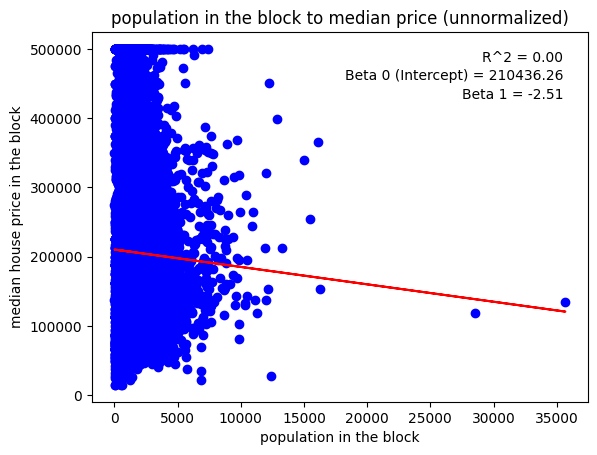

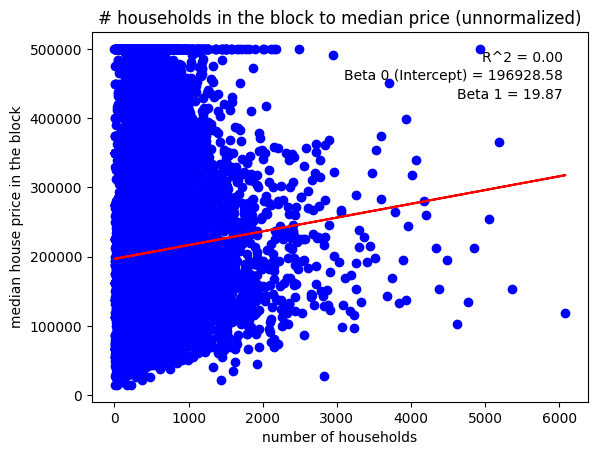

In [6]:
population_to_price_unnormalized = plot_linear_regression(
    predictor = population_col, 
    outcome = median_house_value_col, 
    title = "population in the block to median price (unnormalized)", 
    xlab = "population in the block", 
    ylab = "median house price in the block"
)


households_to_price_unnormalized = plot_linear_regression(
    predictor = households_col, 
    outcome = median_house_value_col, 
    title = "# households in the block to median price (unnormalized)", 
    xlab = "number of households", 
    ylab = "median house price in the block", 
)


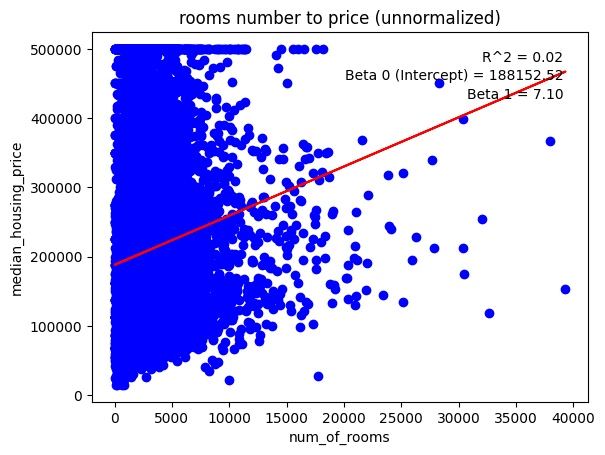

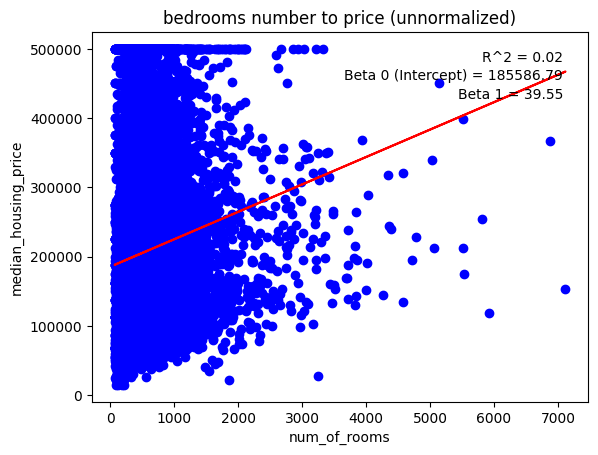

In [7]:
rooms_to_price_unnormalized = plot_linear_regression(
    predictor = total_rooms_col, outcome = median_house_value_col, 
    title = "rooms number to price (unnormalized)", 
    xlab = "num_of_rooms", 
    ylab = "median_housing_price", 
)

bedrooms_to_price_unnormalized = plot_linear_regression(
    predictor = total_bedrooms_col, 
    outcome = median_house_value_col, 
    title = "bedrooms number to price (unnormalized)", 
    xlab = "num_of_rooms", 
    ylab = "median_housing_price", 
)


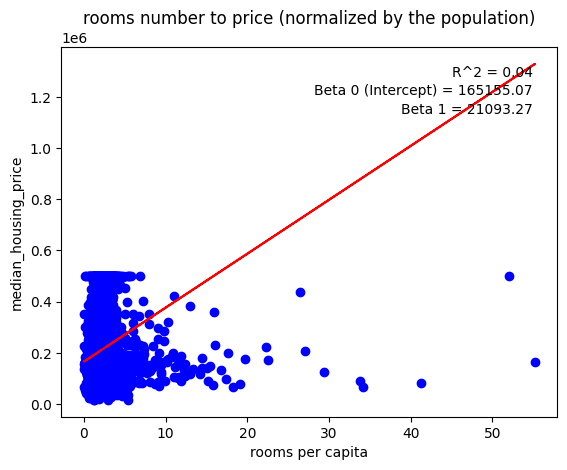

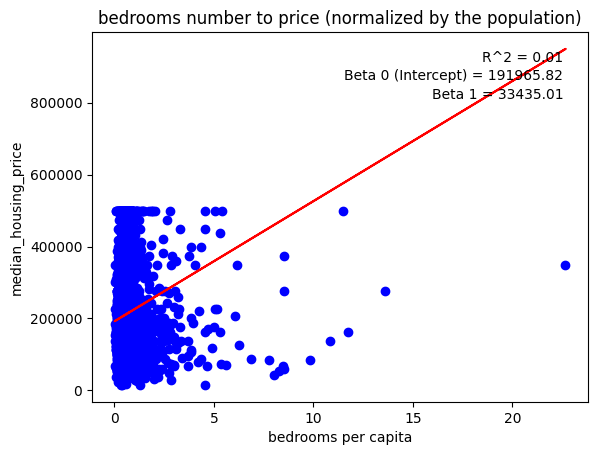

In [8]:
rooms_to_price_normalized_by_population = plot_linear_regression(
    predictor = rooms_by_population, 
    outcome = median_house_value_col, 
    title = "rooms number to price (normalized by the population)", 
    xlab = "rooms per capita", 
    ylab = "median_housing_price", 
)

bedrooms_to_price_normalized_by_population = plot_linear_regression(
    predictor = bedrooms_by_population, 
    outcome = median_house_value_col,
    title = "bedrooms number to price (normalized by the population)", 
    xlab = "bedrooms per capita", 
    ylab = "median_housing_price", 
)


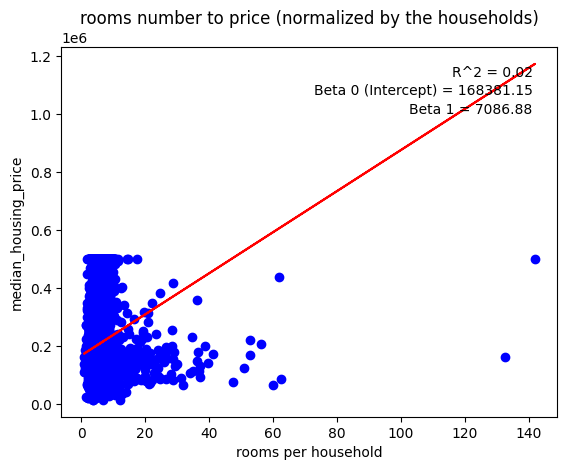

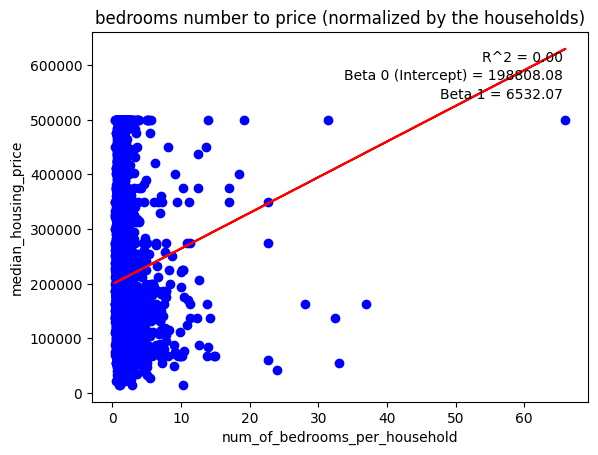

In [9]:

rooms_to_price_normalized_by_households = plot_linear_regression(
    predictor = rooms_by_households, 
    outcome = median_house_value_col, 
    title = "rooms number to price (normalized by the households)", 
    xlab = "rooms per household", 
    ylab = "median_housing_price", 
)

bedrooms_to_price_normalized_by_households = plot_linear_regression(
    predictor = bedrooms_by_households, 
    outcome = median_house_value_col, 
    title = "bedrooms number to price (normalized by the households)", 
    xlab = "num_of_bedrooms_per_household", 
    ylab = "median_housing_price"
)


In [10]:
print("Correlation coff between 'population' and 'house_value': ", np.corrcoef(population_col, median_house_value_col)[0, 1])
print("Correlation coff between 'number of households' and 'house_value': ", np.corrcoef(households_col, median_house_value_col)[0, 1])

print("Correlation coff between 'number of rooms' and 'house_value': ", np.corrcoef(total_rooms_col, median_house_value_col)[0, 1])
print("Correlation coff between 'number of bedrooms' and 'house_value': ", np.corrcoef(total_bedrooms_col, median_house_value_col)[0, 1])

print("Correlation coff between 'number of rooms normalized by population' and 'house_value': ", np.corrcoef(rooms_by_population, median_house_value_col)[0, 1])
print("Correlation coff between 'number of bedrooms normalized by population' and 'house_value': ", np.corrcoef(bedrooms_by_population, median_house_value_col)[0, 1])

print("Correlation coff between 'number of rooms normalized by households' and 'house_value': ", np.corrcoef(rooms_by_households, median_house_value_col)[0, 1])
print("Correlation coff between 'number of bedrooms normalized by households' and 'house_value': ", np.corrcoef(bedrooms_by_households, median_house_value_col)[0, 1])

Correlation coff between 'population' and 'house_value':  -0.024649678888894893
Correlation coff between 'number of households' and 'house_value':  0.06584265057005649
Correlation coff between 'number of rooms' and 'house_value':  0.1341531138065631
Correlation coff between 'number of bedrooms' and 'house_value':  0.1341536985700889
Correlation coff between 'number of rooms normalized by population' and 'house_value':  0.20948196900668967
Correlation coff between 'number of bedrooms normalized by population' and 'house_value':  0.11309509846221796
Correlation coff between 'number of rooms normalized by households' and 'house_value':  0.15194828974145796
Correlation coff between 'number of bedrooms normalized by households' and 'house_value':  0.0582604339126752


In [11]:
from tabulate import tabulate

# Data
data = [
    ["Population", np.corrcoef(population_col, median_house_value_col)[0, 1]],
    ["Number of households", np.corrcoef(households_col, median_house_value_col)[0, 1]],
    ["Number of rooms", np.corrcoef(total_rooms_col, median_house_value_col)[0, 1]],
    ["Number of bedrooms", np.corrcoef(total_bedrooms_col, median_house_value_col)[0, 1]],
    ["Rooms normalized by population", np.corrcoef(rooms_by_population, median_house_value_col)[0, 1]],
    ["Bedrooms normalized by population", np.corrcoef(bedrooms_by_population, median_house_value_col)[0, 1]],
    ["Rooms normalized by households", np.corrcoef(rooms_by_households, median_house_value_col)[0, 1]],
    ["Bedrooms normalized by households", np.corrcoef(bedrooms_by_households, median_house_value_col)[0, 1]],
]

# Table header
headers = ["Variable", "Correlation coefficient"]

# Print table
print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------------------------------+---------------------------+
| Variable                          |   Correlation coefficient |
+===================================+===========================+
| Population                        |                -0.0246497 |
+-----------------------------------+---------------------------+
| Number of households              |                 0.0658427 |
+-----------------------------------+---------------------------+
| Number of rooms                   |                 0.134153  |
+-----------------------------------+---------------------------+
| Number of bedrooms                |                 0.134154  |
+-----------------------------------+---------------------------+
| Rooms normalized by population    |                 0.209482  |
+-----------------------------------+---------------------------+
| Bedrooms normalized by population |                 0.113095  |
+-----------------------------------+---------------------------+
| Rooms no

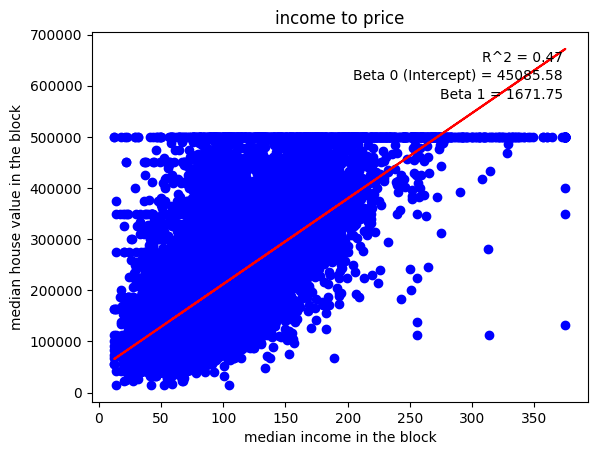

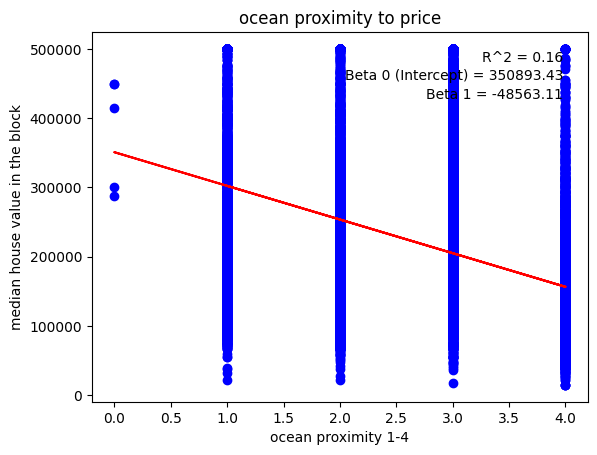

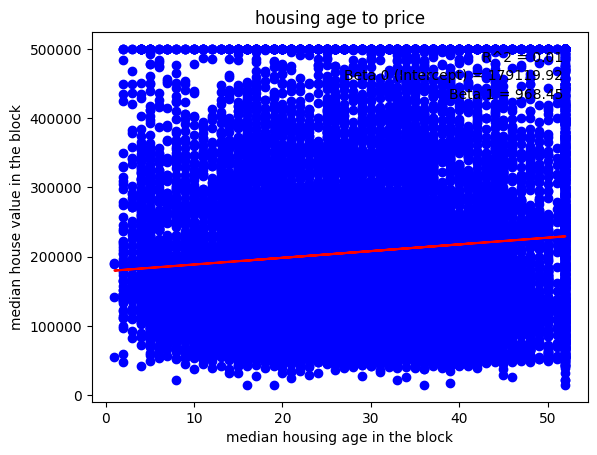

In [12]:
median_income_to_price = plot_linear_regression(
    predictor = median_income_col, 
    outcome = median_house_value_col, 
    title = "income to price", 
    xlab = "median income in the block", 
    ylab = "median house value in the block"
)

ocean_proximity_to_price = plot_linear_regression(
    predictor = ocean_proximity_col, 
    outcome = median_house_value_col, 
    title = "ocean proximity to price", 
    xlab = "ocean proximity 1-4", 
    ylab = "median house value in the block"
)

housing_median_age_to_price = plot_linear_regression(
    predictor = housing_median_age_col, 
    outcome = median_house_value_col, 
    title = "housing age to price", 
    xlab = "median housing age in the block", 
    ylab = "median house value in the block"
)

In [13]:
# Reading data from a CSV file into a NumPy array
def read_csv(filename):
    data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(row)
    return np.array(data)

file_path = 'housingUnits.csv'
data = read_csv(file_path)
all_columns = data[0:1, :]  # This selects all rows and all columns
print(all_columns)

[['\ufeffhousing_median_age' 'total_rooms' 'total_bedrooms' 'population'
  'households' 'median_income' 'ocean_proximity' 'median_house_value']]


In [14]:
def multiple_regression(data):
    """
    without normalization: simply taking all the predictor columns and then outcome and mapping it in the 8D
    """
    data_array = np.array(data[1:], dtype=float) # make numeric and remove the first header row
    
    # I am using RAW predictors 2 and 3 (not normalized)
    x = data_array[:, :-1]  # Select all columns except the last one as predictors
    y = data_array[:, -1]   # Select the last column as outcome
    
    # Split data into training and testing sets + add a seed for random gen
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

    # Let's now fit linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # generating predictions based on the testing set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Return relevant statistics
    return {
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "r2_score": r2,
        "rmse": rmse,
        "mae": mae,
    }
    
print("Using all the raw predictors: \n")

results = multiple_regression(data)
print("--------------------------------------------")
print("Intercept: ", results["intercept"])
print("--------------------------------------------")
for i, ii in enumerate(results['coefficients']):
    print("Beta {}: ".format(i+1), ii)
print("--------------------------------------------")
print("R^2 Score: ", results["r2_score"])
print("--------------------------------------------")
print("RMSE: ", results["rmse"])
print("--------------------------------------------")
print("Mean arithmetic error: ", results["mae"])
print("--------------------------------------------")

Using all the raw predictors: 

--------------------------------------------
Intercept:  61420.40794291612
--------------------------------------------
Beta 1:  1208.5653100956806
Beta 2:  -47.693666214856954
Beta 3:  217.25066034241667
Beta 4:  -38.88095305142316
Beta 5:  178.33433850081292
Beta 6:  1694.0724863453358
Beta 7:  -26217.362887313957
--------------------------------------------
R^2 Score:  0.5878967849154422
--------------------------------------------
RMSE:  74432.94343469487
--------------------------------------------
Mean arithmetic error:  54184.15148779294
--------------------------------------------


In [15]:
from sklearn.preprocessing import StandardScaler

def multiple_regression_with_normalized(data):
    """
    with normalized variables
    """
    housing_median_age_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(0,), skip_header=1)
    median_income_col = np.genfromtxt(file_path, delimiter=',', dtype=float, usecols=(5,), skip_header=1)
    ocean_proximity_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(6,), skip_header=1)
    median_house_value_col = np.genfromtxt(file_path, delimiter=',', dtype=float, usecols=(7,), skip_header=1)

    # Normalizing our columns
    total_rooms_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(1,), skip_header=1)
    total_bedrooms_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(2,), skip_header=1)
    population_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(3,), skip_header=1)
    households_col = np.genfromtxt(file_path, delimiter=',', dtype=int, usecols=(4,), skip_header=1)
    
    rooms_by_population = total_rooms_col / population_col
    bedrooms_by_population = total_bedrooms_col / population_col
    

    # Using selected columns as predictors
    X = np.column_stack((housing_median_age_col, median_income_col, ocean_proximity_col,
                         rooms_by_population, bedrooms_by_population, households_col, population_col))

    # Using median_house_value_col as outcome
    y = median_house_value_col

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    # Normalizing features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Generate predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Return relevant statistics
    return {
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "r2_score": r2,
        "rmse": rmse
    }


results = multiple_regression_with_normalized(data)
print("Using normalized predictors: ")
print("--------------------------------------------")
print("Intercept: ", results["intercept"])
print("--------------------------------------------")
for i, ii in enumerate(results['coefficients']):
    print("Beta {}: ".format(i+1), ii)
print("--------------------------------------------")
print("R^2 Score: ", results["r2_score"])
print("--------------------------------------------")
print("RMSE: ", results["rmse"])
print("--------------------------------------------")

Using normalized predictors: 
--------------------------------------------
Intercept:  206713.46705426337
--------------------------------------------
Beta 1:  16423.532840938216
Beta 2:  75777.05352651316
Beta 3:  -26089.565802144738
Beta 4:  2651.170666096769
Beta 5:  2375.0109541437737
Beta 6:  50453.610840641646
Beta 7:  -42354.4432774165
--------------------------------------------
R^2 Score:  0.5858832464347383
--------------------------------------------
RMSE:  74614.56173497147
--------------------------------------------


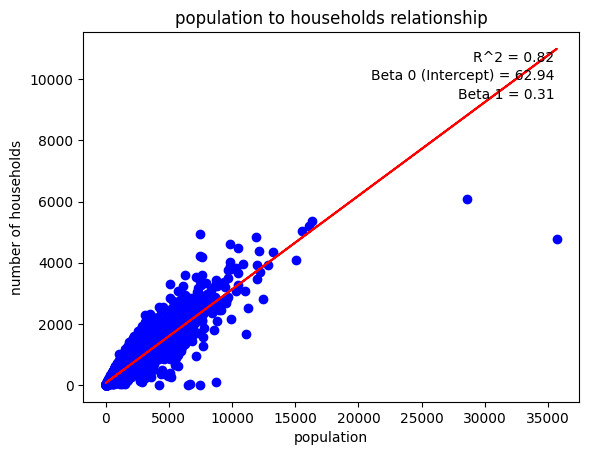

In [16]:
pop_to_households = plot_linear_regression(
    predictor = population_col, 
    outcome = households_col, 
    title = "population to households relationship", 
    xlab = "population", 
    ylab = "number of households"
)

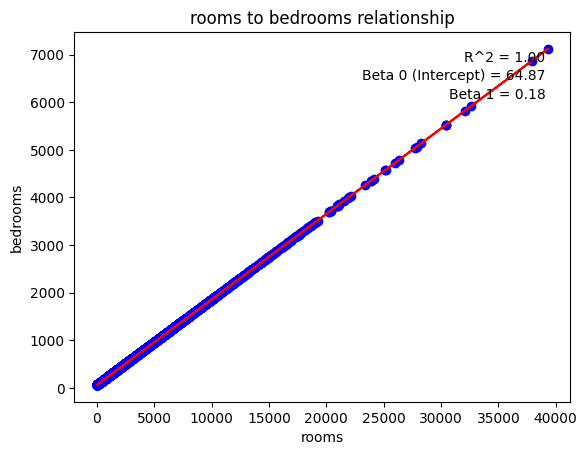

In [17]:
rooms_to_bedrooms = plot_linear_regression(
    predictor = total_rooms_col, 
    outcome = total_bedrooms_col, 
    title = "rooms to bedrooms relationship", 
    xlab = "rooms", 
    ylab = "bedrooms"
)

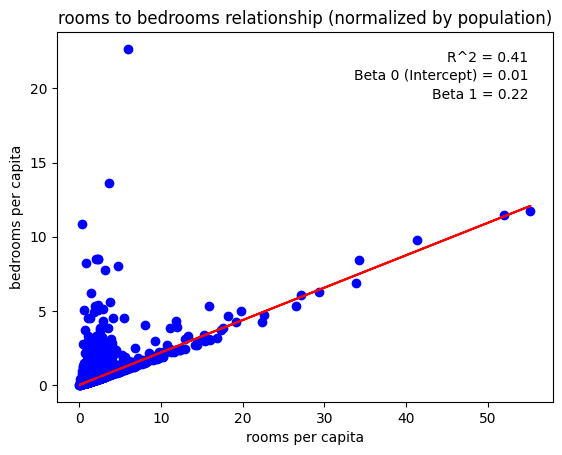

In [18]:
rooms_to_bedrooms_normalized = plot_linear_regression(
    predictor = rooms_by_population, 
    outcome = bedrooms_by_population, 
    title = "rooms to bedrooms relationship (normalized by population)", 
    xlab = "rooms per capita", 
    ylab = "bedrooms per capita"
)

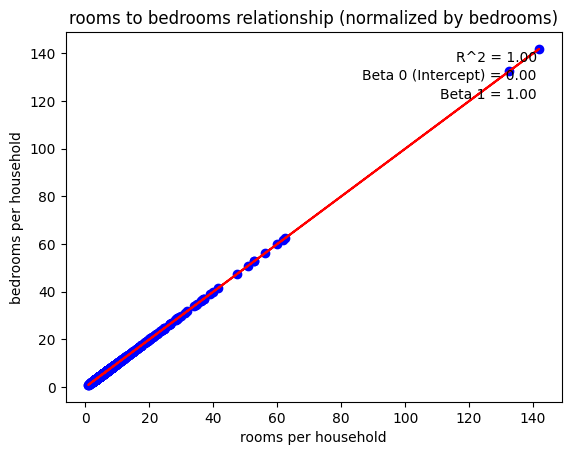

In [19]:
rooms_to_bedrooms_normalized = plot_linear_regression(
    predictor = rooms_by_households, 
    outcome = rooms_by_households, 
    title = "rooms to bedrooms relationship (normalized by bedrooms)", 
    xlab = "rooms per household", 
    ylab = "bedrooms per household"
)

In [20]:
def plot_freq_dist(data, color: str = "red", title: str = "N/A"):
    """
    data: 1d dataframe to plot on the graph
    """
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)

    plt.hist(data, edgecolor=color, bins=bins) 
    plt.xlabel("{} distribution".format(title))  # Set x-axis label
    plt.ylabel("frequency")     # Set y-axis label
    plt.show()  # Show the plot

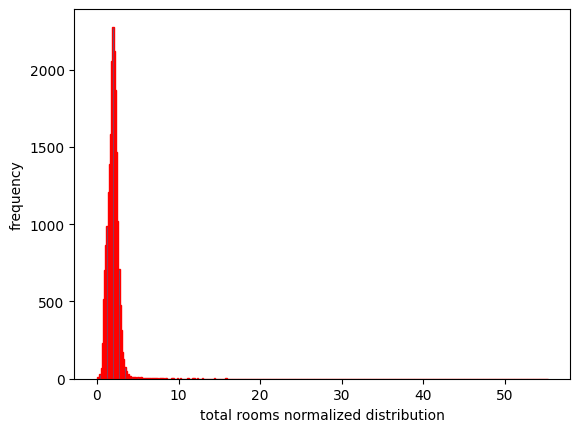

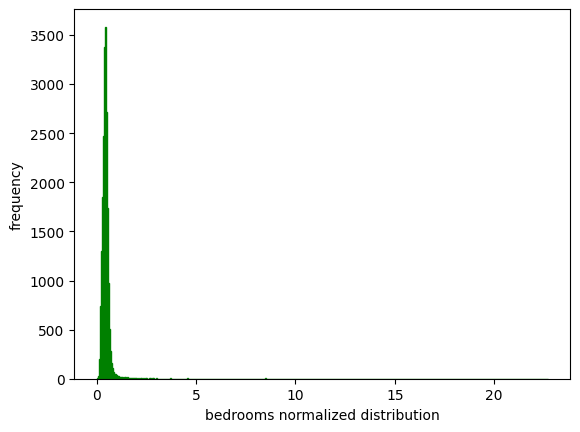

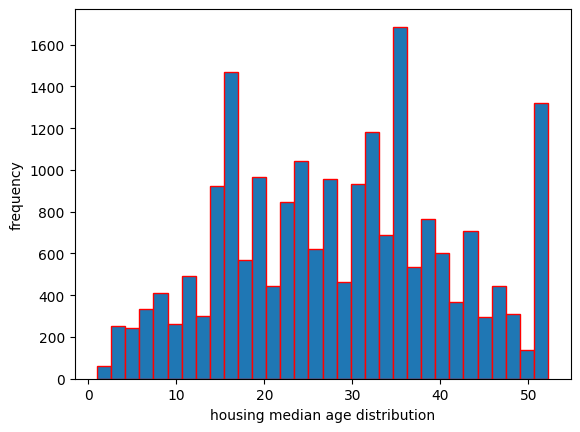

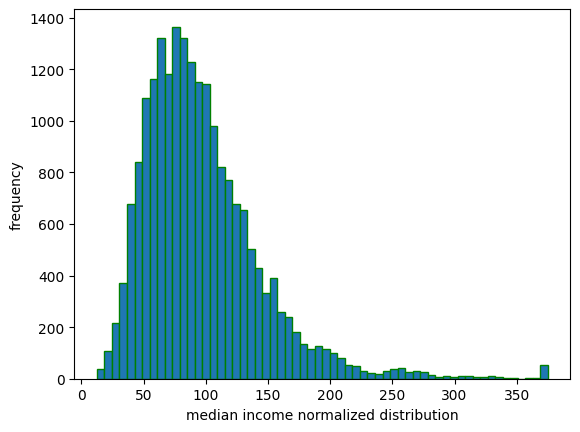

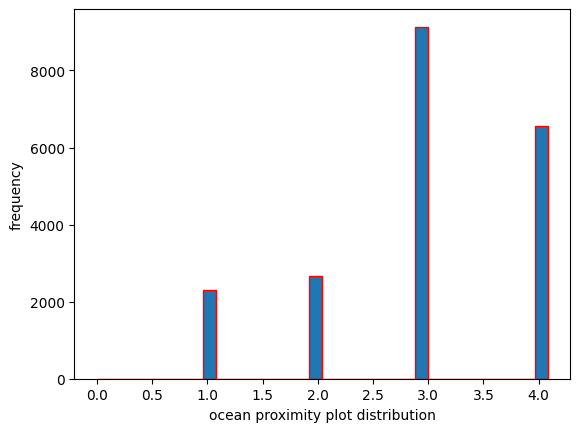

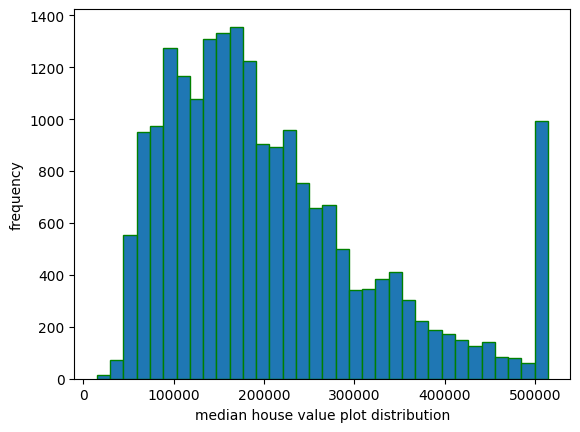

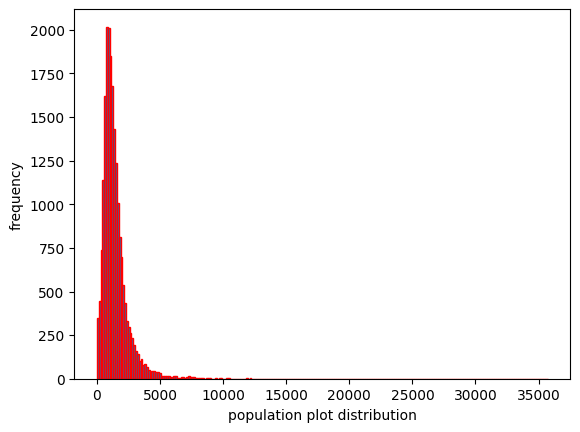

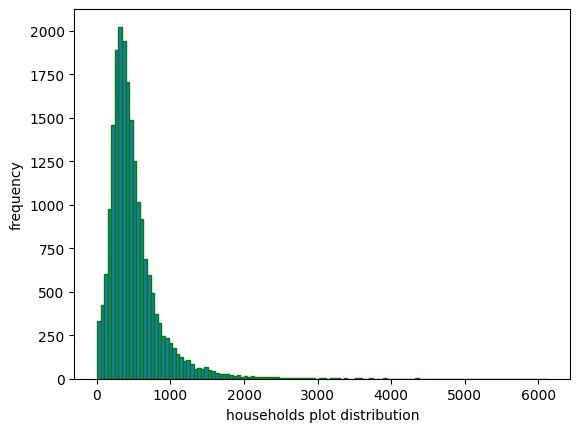

In [21]:
rooms_normalized_plot = plot_freq_dist(rooms_by_population, color = "red", title="total rooms normalized")
bedrooms_normalized_plot = plot_freq_dist(bedrooms_by_population, color = "green", title="bedrooms normalized")

housing_median_age_plot = plot_freq_dist(housing_median_age_col, color = "red", title="housing median age")
median_income_plot = plot_freq_dist(median_income_col, color = "green", title="median income normalized")

ocean_proximity_plot = plot_freq_dist(ocean_proximity_col, color = "red", title="ocean proximity plot")
median_house_value_plot = plot_freq_dist(median_house_value_col, color = "green", title="median house value plot")

population_plot = plot_freq_dist(population_col, color = "red", title="population plot")
households_plot = plot_freq_dist(households_col, color = "green", title="households plot")
